# Imports, load variables and look at data

In [35]:
import pickle
import pylab
import numpy as np
import matplotlib.pyplot as plt
import cv2
import subprocess

In [8]:
videos = [
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-14 14-05-56_interaction_6_utterance_10_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-13 10-58-57_interaction_1_utterance_5_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-14 15-23-09_interaction_4_utterance_12_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-21 16-03-04_interaction_4_utterance_8_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-25 14-24-59_interaction_1_utterance_23_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-25 16-38-29_interaction_3_utterance_20_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-27 10-56-09_interaction_5_utterance_14_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-21 16-03-04_interaction_4_utterance_20_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-04-27 09-48-17_interaction_5_utterance_10_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-05-02 14-08-19_interaction_3_utterance_25_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/YES/2023-05-05 14-55-03_interaction_6_utterance_3_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-20 14-01-12_interaction_1_utterance_7_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-13 10-58-57_interaction_2_utterance_7_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-20 10-39-14_interaction_6_utterance_15_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-20 13-01-21_interaction_1_utterance_12_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-27 09-48-17_interaction_1_utterance_25_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-28 12-39-45_interaction_3_utterance_20_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-05-05 14-55-03_interaction_6_utterance_22_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-21 16-03-04_interaction_6_utterance_16_merged_cropped.mp4",
"/project_ghent/Master-Thesis/no_robot_audio/labelled/CROPPED/NO/2023-04-20 13-01-21_interaction_6_utterance_17_merged_cropped.mp4",
]

# Videos square cropped
square_videos = [
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-14 14-05-56_interaction_6_utterance_10_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-13 10-58-57_interaction_1_utterance_5_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-14 15-23-09_interaction_4_utterance_12_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-21 16-03-04_interaction_4_utterance_8_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-25 14-24-59_interaction_1_utterance_23_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-25 16-38-29_interaction_3_utterance_20_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-27 10-56-09_interaction_5_utterance_14_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-21 16-03-04_interaction_4_utterance_20_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-27 09-48-17_interaction_5_utterance_10_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-05-02 14-08-19_interaction_3_utterance_25_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-05-05 14-55-03_interaction_6_utterance_3_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-20 14-01-12_interaction_1_utterance_7_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-13 10-58-57_interaction_2_utterance_7_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-20 10-39-14_interaction_6_utterance_15_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-20 13-01-21_interaction_1_utterance_12_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-27 09-48-17_interaction_1_utterance_25_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-28 12-39-45_interaction_3_utterance_20_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-05-05 14-55-03_interaction_6_utterance_22_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-21 16-03-04_interaction_6_utterance_16_merged.mp4",
"/project_ghent/Master-Thesis/featureExtraction/square_videos/2023-04-20 13-01-21_interaction_6_utterance_17_merged.mp4",
]
all_frames = [
    [240, 750, 1020],
    [420],
    [600, 1020],
    [40, 120, 720],
    [360, 540],
    [300, 500],
    [250, 750, 870],
    [1500, 1600],
    [720],
    [1500, 1600],
    [720, 840, 960],
    [270, 330, 630],
    [560],
    [360, 780, 1440, 1620, 1800, 2200, 2460],
    [100, 500],
    [60, 540, 720],
    [300, 540],
    [840, 1080, 2160],
    [150, 300],
    [200, 840]
]

MP_TASK_FILE = "/project_ghent/Master-Thesis/featureExtraction/face_landmarker_with_blendshapes.task"
BLENDNAMES = ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'cheekPuff', 'cheekSquintLeft', 'cheekSquintRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInLeft', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeLookUpLeft', 'eyeLookUpRight', 'eyeSquintLeft', 'eyeSquintRight', 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthDimpleLeft', 'mouthDimpleRight', 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLeft', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPressLeft', 'mouthPressRight', 'mouthPucker', 'mouthRight', 'mouthRollLower', 'mouthRollUpper', 'mouthShrugLower', 'mouthShrugUpper', 'mouthSmileLeft', 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight', 'noseSneerLeft', 'noseSneerRight']
STRONG_BLENDNAMES = ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight','eyeLookInLeft', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPucker', 'mouthRight', 'mouthSmileLeft', 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight']
blendshape_dict = {blendshape: index for index, blendshape in enumerate(BLENDNAMES)}

In [6]:
VIDEO_RANGE = 20

# Retrieve the object that are face cropped
pickle_dir = "pickled/"

blendshape_strings = [f"blendshapes{i}" for i in range(VIDEO_RANGE)]
blendshape_objects = []
landmark_strings = [f"landmarks{i}" for i in range(VIDEO_RANGE)]
landmark_objects = []

for string in blendshape_strings:
    with open(f"{pickle_dir}{string}.pickle", "rb") as f:
        blendshape_objects.append(pickle.load(f))
print(len(blendshape_objects))

for string in landmark_strings:
    with open(f"{pickle_dir}{string}.pickle", "rb") as f:
        landmark_objects.append(pickle.load(f))
print(len(landmark_objects))

# Retrieve the object that are square cropped
pickle_dir_square = "pickled_square/"

blendshape_strings_square = [f"blendshapes{i}" for i in range(VIDEO_RANGE)]
blendshape_objects_square = []
landmark_strings_square = [f"landmarks{i}" for i in range(VIDEO_RANGE)]
landmark_objects_square = []

for string in blendshape_strings_square:
    with open(f"{pickle_dir_square}{string}.pickle", "rb") as f:
        blendshape_objects_square.append(pickle.load(f))
print(len(blendshape_objects_square))

for string in landmark_strings_square:
    with open(f"{pickle_dir_square}{string}.pickle", "rb") as f:
        landmark_objects_square.append(pickle.load(f))
print(len(landmark_objects_square))

20
20
20
20


In [9]:
def get_frames_per_landmark(landmarks):
    landmarks_per_landmark = []
    for i in range(len(landmarks[0])):
        values_landmark_i = []
        for frame in landmarks:
            values_landmark_i.append(frame[i])
        landmarks_per_landmark.append(values_landmark_i)
    return landmarks_per_landmark

def show_keypoints(window_size, objects):
    for index_video in range(VIDEO_RANGE):
        landmarksums = []
        for landmarks in objects[index_video]:
            sum = 0
            for landmark in landmarks:
                sum += landmark.x + landmark.y # Adding z does not add any benefits
            landmarksums.append(sum)
        
        plt.plot(np.convolve(landmarksums, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2])
        # plt.plot(landmarksums)
        for frame in all_frames[index_video]:
            plt.axvline(x=frame, color='red')
        plt.title(f"Summed keypoints (face cropped)\n [{videos[index_video].split('/')[-1]}]")
        plt.xlabel("Frame number")
        plt.ylabel("Keypoint values")
        plt.show()

In [ ]:
show_keypoints(45, landmark_objects)

In [ ]:
show_keypoints(45, landmark_objects_square)

# Peak detection algorithm

In [15]:
# Implementation of algorithm from https://stackoverflow.com/a/22640362/6029703
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [23]:
def evaluate_keypoint_objects_with_thresholding_algo(window_size, lag, threshold, influence, objects, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        landmarksums = []
        for landmarks in objects[index_video]:
            sum = 0
            for landmark in landmarks:
                sum += landmark.x + landmark.y # Adding z does not add any benefits
            landmarksums.append(sum)
        
        # y = landmarksums
        y = np.convolve(landmarksums, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

        if verbose:
            # Plot result
            pylab.subplot(211)
            pylab.title(f"Peak detection with Lag={lag}, Threshold={threshold}, Influence={influence}\n[{videos[index_video].split('/')[-1]}]")
            pylab.plot(np.arange(1, len(y) + 1 - lag), y[lag:], label="Keypoint values")
            
            # pylab.plot(np.arange(1, len(y) + 1 - lag),
            #            result["avgFilter"][lag:], color="cyan", lw=2)
            
            pylab.plot(np.arange(1, len(y) + 1 - lag),
                    result["avgFilter"][lag:] + threshold * result["stdFilter"][lag:], color="green", lw=2, label='Threshold')
            
            pylab.plot(np.arange(1, len(y) + 1 - lag),
                    result["avgFilter"][lag:] - threshold * result["stdFilter"][lag:], color="green", lw=2)
            pylab.ylabel("Keypoint value")
            pylab.xlabel("Frame number")
            pylab.legend()
            
            pylab.subplot(212)
            pylab.step(np.arange(1, len(y) + 1 - lag), abs(result["signals"][lag:]), color="orange", linestyle='--', lw=2, label="Predicted")
            pylab.ylim(0, 1)

            initial = True
            for frame in all_frames[index_video]:
                if initial:
                    pylab.axvline(x=frame, color='blue', linestyle='--', label="Annotated")
                    initial = False
                else:
                    pylab.axvline(x=frame, color='blue', linestyle='--')

            pylab.ylabel("Detected peak")
            pylab.xlabel("Frame number")
            pylab.legend()
            
            pylab.subplots_adjust(hspace=0.3)
            pylab.show()

        cut_frames = np.nonzero(result["signals"][lag:])[0]
        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True

        min_distance = 0
        if cut_frames.size != 0:
            for frame in all_frames[index_video]:
                min_distance += min(abs(np.array(cut_frames) - frame)) 
                
        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

In [24]:
window_size = 45
lag = 10
threshold = 5
influence = 0.5
evaluate_keypoint_objects_with_thresholding_algo(window_size, lag, threshold, influence, landmark_objects, verbose=False)

Total predictions: 17/49
Total minimum distance: 6387
[557, 119, 161, 350, 97, 199, 883, 354, 0, 310, 173, 641, 66, 602, 205, 649, 38, 691, 107, 185]
[0.3333333333333333, 0.0, 0.5, 0.6666666666666666, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.42857142857142855, 0.0, 0.3333333333333333, 1.0, 0.0, 1.0, 0.0] -> 0.3130952380952381


In [25]:
window_size = 45
lag = 10
threshold = 5
influence = 0.5
evaluate_keypoint_objects_with_thresholding_algo(window_size, lag, threshold, influence, landmark_objects_square, verbose=False)

Total predictions: 6/49
Total minimum distance: 10838
[1100, 186, 1574, 1053, 408, 112, 0, 116, 177, 1532, 1587, 0, 270, 1126, 290, 0, 698, 465, 0, 144]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42857142857142855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5] -> 0.09642857142857143


In [67]:
def evaluate_blendshape_objects_with_thresholding_algo(window_size, lag, threshold, influence, objects, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        blendshapesum = []
        for blendshapes in objects[index_video]:
            sum = 0
            for blendshape in blendshapes:
                sum += blendshape
            blendshapesum.append(sum)
        
        # y = landmarksums
        y = np.convolve(blendshapesum, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

        if verbose:
            # Plot result
            pylab.subplot(211)
            pylab.title(f"Peak detection with Lag={lag}, Threshold={threshold}, Influence={influence}\n[{videos[index_video].split('/')[-1]}]")
            pylab.plot(np.arange(1, len(y) + 1 - lag), y[lag:], label="Blendshape values")
            
            # pylab.plot(np.arange(1, len(y) + 1 - lag),
            #            result["avgFilter"][lag:], color="cyan", lw=2)
            
            pylab.plot(np.arange(1, len(y) + 1 - lag),
                    result["avgFilter"][lag:] + threshold * result["stdFilter"][lag:], color="green", lw=2, label='Threshold')
            
            pylab.plot(np.arange(1, len(y) + 1 - lag),
                    result["avgFilter"][lag:] - threshold * result["stdFilter"][lag:], color="green", lw=2)
            pylab.ylabel("Blendshape value")
            pylab.xlabel("Frame number")
            pylab.legend()
            
            pylab.subplot(212)
            pylab.step(np.arange(1, len(y) + 1 - lag), abs(result["signals"][lag:]), color="orange", linestyle='--', lw=2, label="Predicted")
            pylab.ylim(0, 1)

            initial = True
            for frame in all_frames[index_video]:
                if initial:
                    pylab.axvline(x=frame, color='blue', linestyle='--', label="Annotated")
                    initial = False
                else:
                    pylab.axvline(x=frame, color='blue', linestyle='--')

            pylab.ylabel("Detected peak")
            pylab.xlabel("Frame number")
            pylab.legend()
            
            pylab.subplots_adjust(hspace=0.3)
            pylab.show()

        cut_frames = np.nonzero(result["signals"][lag:])[0]
        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True

        min_distance = 0
        if cut_frames.size != 0:
            for frame in all_frames[index_video]:
                min_distance += min(abs(np.array(cut_frames) - frame)) 
                
        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

In [73]:
window_size = 45
lag = 10
threshold = 5
influence = 0.5
evaluate_blendshape_objects_with_thresholding_algo(window_size, lag, threshold, influence, blendshape_objects, verbose=False)

Total predictions: 22/49
Total minimum distance: 4149
[271, 47, 129, 168, 74, 90, 268, 206, 42, 104, 163, 209, 177, 634, 117, 644, 167, 268, 250, 121]
[0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.5, 0.5, 0.3333333333333333, 0.5, 1.0, 0.5, 0.6666666666666666, 0.3333333333333333, 0.0, 0.2857142857142857, 0.5, 0.0, 0.0, 0.6666666666666666, 0.5, 0.5] -> 0.4809523809523809


In [75]:
window_size = 45
lag = 10
threshold = 5
influence = 0.5
evaluate_blendshape_objects_with_thresholding_algo(window_size, lag, threshold, influence, blendshape_objects_square, verbose=False)

Total predictions: 24/49
Total minimum distance: 4196
[92, 319, 200, 253, 153, 199, 173, 170, 208, 98, 102, 0, 206, 466, 157, 423, 238, 571, 97, 71]
[1.0, 0.0, 0.5, 0.6666666666666666, 0.5, 0.0, 0.6666666666666666, 0.5, 0.0, 1.0, 1.0, 0.0, 0.0, 0.5714285714285714, 0.0, 0.3333333333333333, 0.0, 0.0, 1.0, 1.0] -> 0.43690476190476185


In [74]:
window_size = 45
lag = 10
threshold = 10
influence = 0.5
evaluate_blendshape_objects_with_thresholding_algo(window_size, lag, threshold, influence, blendshape_objects_square, verbose=False)

Total predictions: 2/49
Total minimum distance: 9935
[1578, 410, 0, 0, 180, 0, 0, 1336, 210, 0, 0, 0, 0, 5057, 269, 0, 0, 0, 256, 639]
[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0] -> 0.05


# Detect difference in landmarks

In [36]:
def calc_square_distance(tup1, tup2):
    return np.sqrt(abs((tup1[0] - tup2[0])**2 - (tup1[1] - tup2[1])**2)) 

def save_video(inputpath, outputpath, frames_to_keep):
    temp_path = "temp.mp4"
    
    video_capture = cv2.VideoCapture(inputpath)
    width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))
    v_len = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_video = cv2.VideoWriter(temp_path, fourcc, fps, (width, height))
    
    amount_of_frames = 0
    for start, end in frames_to_keep:
        # Shift start and end such that the amount of frames is always the same
        if end > v_len:
            start -= end - v_len
            end = v_len
        elif start < 0:
            end -= start - 1
            start = 0

        video_capture = cv2.VideoCapture(inputpath)
        count = 0
        while True:
            count += 1
            ret, frame = video_capture.read()
            if not ret:
                break

            if count >= start and count <= end:
                output_video.write(frame)
                amount_of_frames += 1
            elif count > end:
                break

    assert amount_of_frames == 360, f"Amount of frames is {amount_of_frames}"
    
    video_capture.release()
    output_video.release()

    # Convert to playable format in jupyter notebooks
    command = [
            "ffmpeg",
            "-y",
            "-i", temp_path,
            "-c:v", "libx264",
            "-crf", "23",
            "-c:a", "aac",
            "-strict", "experimental",
            outputpath
        ]

    subprocess.run(command, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    
    print("Video saved successfully at:", outputpath)

def get_frames_per_blendshape(blendshapes):
    blendshapes_per_blendshape = []
    for i in range(len(blendshapes[0])):
        values_blendshape_i = []
        for frame in blendshapes:
            values_blendshape_i.append(frame[i])
        blendshapes_per_blendshape.append(values_blendshape_i)
    return blendshapes_per_blendshape

def normalize_blendshapes(blendshapes):
    new_blendshapes = []
    for blendshape in get_frames_per_blendshape(blendshapes):
        blendshape = np.array(blendshape)
        blendshape /= max(blendshape)
        new_blendshapes.append(blendshape)
    return get_frames_per_blendshape(new_blendshapes)

In [53]:
def sum_keypoints(amount_of_fragments, window_size, objects, length_of_fragment=120, VIDEO_RANGE=20, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        differences = []
        for landmarks in objects[index_video]:
            sum = 0
            for landmark in landmarks:
                sum += landmark.x + landmark.y
            differences.append(sum)

        differences = np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        
        sorted_max = np.argsort(differences)

        cut_frames = []
        count = -1
        while len(cut_frames) != amount_of_fragments:
            maxi = sorted_max[count]
            if all(maxi > cut + 60 for cut in cut_frames) or all(maxi < cut - 60 for cut in cut_frames):
            # if not old_maxi or maxi > old_maxi + length_of_fragment or maxi < old_maxi - length_of_fragment:
                cut_frames.append(maxi)
            count -= 1
            if abs(count) > len(sorted_max):
                break
    
        cut_frames = sorted(cut_frames)

        # Calculate start and end for cutting different fragments and save the video
        cut_tuple_frames = [(cut - length_of_fragment//2, cut + length_of_fragment//2 - 1) for cut in cut_frames] # -1 for taking getting a total of 360 frames
        # save_video(videos[index_video], f"{outpath}{videos[index_video].split('/')[-1][:-10]}short.mp4", cut_tuple_frames)
        # save_video(videos[index_video], f"out.mp4", cut_tuple_frames)

        if verbose:
            # Plot the figure
            plt.figure(figsize=(16,8))
            # plt.plot(np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2])
            plt.plot(differences)
        
            # Option to show different blendshapes
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkLeft"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkRight"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownLeft"]], color='black')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownRight"]], color='black')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownRight"]], color='purple', label='browDownRight')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownLeft"]], color='purple')
                
            for i, frame in enumerate(all_frames[index_video]):
                if i == 0:
                    plt.axvline(x=frame, color='blue', linestyle='--', label='Annotated')
                else:
                    plt.axvline(x=frame, color='blue', linestyle='--')
            
            for i, cut in enumerate(cut_frames):
                if i == 0:
                    plt.axvline(x=cut, color='orange', linestyle='--', label='Predicted')
                else:
                    plt.axvline(x=cut, color='orange', linestyle='--')

        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True
            
        min_distance = 0
        for frame in all_frames[index_video]:
            min_distance += min(abs(np.array(cut_frames) - frame))               

        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
        if verbose:
            plt.xlabel("Amount of frames")
            plt.ylabel("Difference over all keypoints (sum of square distance)")
            plt.title(f"Difference over all keypoints with respect to the previous frame (square cropped) [{square_videos[index_video].split('/')[-1]}]")
            plt.legend()
            plt.show()

    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

In [54]:
amount_of_fragments = 3
window_size = 45
sum_keypoints(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 16/49
Total minimum distance: 9354
[410, 210, 167, 179, 135, 104, 178, 104, 202, 266, 204, 617, 26, 3516, 279, 430, 195, 1743, 49, 340]
[0.0, 0.0, 0.0, 0.6666666666666666, 0.5, 0.5, 0.6666666666666666, 0.5, 0.0, 0.0, 0.6666666666666666, 0.0, 1.0, 0.14285714285714285, 0.5, 0.0, 0.5, 0.3333333333333333, 1.0, 0.0] -> 0.3488095238095238


In [55]:
amount_of_fragments = 3
window_size = 45
sum_keypoints(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 17/49
Total minimum distance: 10827
[688, 2, 580, 565, 139, 99, 147, 472, 61, 356, 132, 312, 8, 3226, 246, 790, 240, 2256, 90, 418]
[0.3333333333333333, 1.0, 0.0, 0.6666666666666666, 0.5, 0.5, 0.6666666666666666, 0.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 1.0, 0.14285714285714285, 0.5, 0.3333333333333333, 0.0, 0.3333333333333333, 0.5, 0.0] -> 0.37380952380952376


In [39]:
def difference_keypoint(amount_of_fragments, window_size, objects, length_of_fragment=120, VIDEO_RANGE=20, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        differences = []
        prev_coords = []
        # Calculate the difference of the previous frame for every landmark and keep the sum
        for landmarks in objects[index_video]:
            sum_diff = 0
            if prev_coords == []:
                for landmark in landmarks:
                    prev_coords.append((landmark.x, landmark.y))      
            else:
                coords = []
                for landmark in landmarks:
                    coords.append((landmark.x, landmark.y))
                    sum_diff += calc_square_distance(prev_coords[len(coords) - 1], (landmark.x, landmark.y))
                prev_coords = coords
            differences.append(sum_diff)

        differences = np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        
        sorted_max = np.argsort(differences)
        cut_frames = []
        count = -1
        while len(cut_frames) != amount_of_fragments:
            maxi = sorted_max[count]
            if all(maxi > cut + 60 for cut in cut_frames) or all(maxi < cut - 60 for cut in cut_frames):
            # if not old_maxi or maxi > old_maxi + length_of_fragment or maxi < old_maxi - length_of_fragment:
                cut_frames.append(maxi)
            count -= 1
            if abs(count) > len(sorted_max):
                break
    
        cut_frames = sorted(cut_frames)

        # Calculate start and end for cutting different fragments and save the video
        cut_tuple_frames = [(cut - length_of_fragment//2, cut + length_of_fragment//2 - 1) for cut in cut_frames] # -1 for taking getting a total of 360 frames
        # save_video(videos[index_video], f"{outpath}{videos[index_video].split('/')[-1][:-10]}short.mp4", cut_tuple_frames)
        # save_video(videos[index_video], f"out.mp4", cut_tuple_frames)

        if verbose:
            # Plot the figure
            plt.figure(figsize=(16,8))
            # plt.plot(np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2])
            plt.plot(differences)
        
            # Option to show different blendshapes
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkLeft"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkRight"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownLeft"]], color='black')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownRight"]], color='black')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownRight"]], color='purple', label='browDownRight')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownLeft"]], color='purple')
                
            for i, frame in enumerate(all_frames[index_video]):
                if i == 0:
                    plt.axvline(x=frame, color='blue', linestyle='--', label='Annotated')
                else:
                    plt.axvline(x=frame, color='blue', linestyle='--')
            
            for i, cut in enumerate(cut_frames):
                if i == 0:
                    plt.axvline(x=cut, color='orange', linestyle='--', label='Predicted')
                else:
                    plt.axvline(x=cut, color='orange', linestyle='--')

        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True
        
        min_distance = 0
        for frame in all_frames[index_video]:
            min_distance += min(abs(np.array(cut_frames) - frame))               

        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
        if verbose:
            plt.xlabel("Amount of frames")
            plt.ylabel("Difference over all keypoints (sum of square distance)")
            plt.title(f"Difference over all keypoints with respect to the previous frame (face cropped) [{videos[index_video].split('/')[-1]}]")
            plt.legend()
            plt.show()

    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

In [40]:
amount_of_fragments = 1
window_size = 45
difference_keypoint(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 12/49
Total minimum distance: 21430
[894, 236, 420, 859, 244, 200, 710, 174, 6, 2974, 324, 855, 17, 8100, 400, 1281, 604, 2342, 150, 640]
[0.0, 0.0, 0.5, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.5, 1.0, 0.0, 0.3333333333333333, 0.0, 1.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.5] -> 0.3083333333333333


In [41]:
amount_of_fragments = 1
window_size = 45
difference_keypoint(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 13/49
Total minimum distance: 17402
[949, 204, 434, 722, 180, 200, 680, 356, 10, 198, 245, 1023, 17, 7183, 400, 821, 610, 2380, 150, 640]
[0.0, 0.0, 0.5, 0.6666666666666666, 0.5, 0.5, 0.0, 0.0, 1.0, 0.5, 0.3333333333333333, 0.0, 1.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.5, 0.5] -> 0.33333333333333337


In [42]:
amount_of_fragments = 3
window_size = 45
difference_keypoint(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 30/49
Total minimum distance: 7903
[615, 41, 88, 70, 138, 14, 345, 97, 6, 154, 150, 269, 17, 3374, 31, 317, 240, 1878, 21, 38]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.5, 1.0, 0.5, 0.6666666666666666, 0.6666666666666666, 1.0, 0.14285714285714285, 1.0, 0.6666666666666666, 0.5, 0.3333333333333333, 1.0, 1.0] -> 0.7071428571428571


In [43]:
amount_of_fragments = 3
window_size = 45
difference_keypoint(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 26/49
Total minimum distance: 12075
[556, 4, 28, 85, 134, 26, 159, 154, 10, 198, 172, 382, 17, 6756, 75, 233, 240, 2258, 14, 574]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.5, 1.0, 0.5, 0.6666666666666666, 0.0, 1.0, 0.14285714285714285, 0.5, 0.6666666666666666, 0.5, 0.3333333333333333, 1.0, 0.5] -> 0.6238095238095238


In [44]:
amount_of_fragments = 3
window_size = 1
difference_keypoint(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 24/49
Total minimum distance: 7569
[560, 196, 216, 160, 137, 33, 138, 192, 125, 100, 180, 362, 19, 2708, 54, 155, 240, 1886, 56, 52]
[0.3333333333333333, 0.0, 0.5, 0.6666666666666666, 0.5, 1.0, 0.6666666666666666, 0.5, 0.0, 0.5, 0.6666666666666666, 0.0, 1.0, 0.0, 1.0, 0.6666666666666666, 0.5, 0.3333333333333333, 1.0, 1.0] -> 0.5416666666666667


In [45]:
amount_of_fragments = 3
window_size = 1
difference_keypoint(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 25/49
Total minimum distance: 8399
[680, 6, 18, 97, 166, 57, 52, 406, 26, 182, 176, 579, 10, 2656, 156, 205, 146, 2382, 47, 352]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 1.0, 0.5, 0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.6666666666666666, 0.0, 0.3333333333333333, 1.0, 0.5] -> 0.6


In [46]:
amount_of_fragments = 3
window_size = 25
difference_keypoint(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 26/49
Total minimum distance: 7765
[604, 16, 130, 57, 174, 34, 156, 190, 6, 108, 136, 225, 16, 3051, 184, 339, 220, 1907, 41, 171]
[0.0, 1.0, 0.5, 1.0, 0.5, 1.0, 0.6666666666666666, 0.5, 1.0, 0.5, 0.6666666666666666, 0.3333333333333333, 1.0, 0.2857142857142857, 0.5, 0.3333333333333333, 0.5, 0.3333333333333333, 1.0, 0.5] -> 0.6059523809523809


In [47]:
amount_of_fragments = 3
window_size = 25
difference_keypoint(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 28/49
Total minimum distance: 12034
[562, 16, 26, 82, 114, 43, 133, 182, 10, 198, 197, 191, 22, 6882, 68, 207, 129, 2382, 11, 579]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.6666666666666666, 0.5, 1.0, 0.5, 0.6666666666666666, 0.3333333333333333, 1.0, 0.14285714285714285, 0.5, 0.6666666666666666, 0.5, 0.3333333333333333, 1.0, 0.5] -> 0.6571428571428573


In [48]:
amount_of_fragments = 3
window_size = 60
difference_keypoint(amount_of_fragments, window_size, landmark_objects, verbose=False)

Total predictions: 29/49
Total minimum distance: 7773
[603, 45, 67, 89, 106, 200, 315, 47, 6, 77, 136, 275, 27, 2999, 149, 287, 240, 1886, 24, 195]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 0.5, 0.3333333333333333, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 0.14285714285714285, 0.5, 0.6666666666666666, 0.5, 0.3333333333333333, 1.0, 0.5] -> 0.6821428571428572


In [49]:
amount_of_fragments = 3
window_size = 60
difference_keypoint(amount_of_fragments, window_size, landmark_objects_square, verbose=False)

Total predictions: 25/49
Total minimum distance: 12319
[551, 4, 56, 94, 143, 24, 160, 188, 5, 194, 154, 684, 17, 6623, 88, 238, 240, 2256, 21, 579]
[0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.5, 1.0, 0.5, 0.6666666666666666, 0.0, 1.0, 0.14285714285714285, 0.5, 0.6666666666666666, 0.0, 0.3333333333333333, 1.0, 0.5] -> 0.5988095238095238


In [50]:
def sum_blendshape(amount_of_fragments, window_size, objects, length_of_fragment=120, VIDEO_RANGE=20, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        differences = []
        for blendshape in objects[index_video]:
            differences.append(np.sum(blendshape))

        differences = np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        
        sorted_max = np.argsort(differences)

        cut_frames = []
        count = -1
        while len(cut_frames) != amount_of_fragments:
            maxi = sorted_max[count]
            if all(maxi > cut + 60 for cut in cut_frames) or all(maxi < cut - 60 for cut in cut_frames):
            # if not old_maxi or maxi > old_maxi + length_of_fragment or maxi < old_maxi - length_of_fragment:
                cut_frames.append(maxi)
            count -= 1
            if abs(count) > len(sorted_max):
                break
    
        cut_frames = sorted(cut_frames)

        # Calculate start and end for cutting different fragments and save the video
        cut_tuple_frames = [(cut - length_of_fragment//2, cut + length_of_fragment//2 - 1) for cut in cut_frames] # -1 for taking getting a total of 360 frames
        # save_video(videos[index_video], f"{outpath}{videos[index_video].split('/')[-1][:-10]}short.mp4", cut_tuple_frames)
        # save_video(videos[index_video], f"out.mp4", cut_tuple_frames)

        if verbose:
            # Plot the figure
            plt.figure(figsize=(16,8))
            # plt.plot(np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2])
            plt.plot(differences)
        
            # Option to show different blendshapes
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkLeft"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkRight"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownLeft"]], color='black')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownRight"]], color='black')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownRight"]], color='purple', label='browDownRight')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownLeft"]], color='purple')
                
            for i, frame in enumerate(all_frames[index_video]):
                if i == 0:
                    plt.axvline(x=frame, color='blue', linestyle='--', label='Annotated')
                else:
                    plt.axvline(x=frame, color='blue', linestyle='--')
            
            for i, cut in enumerate(cut_frames):
                if i == 0:
                    plt.axvline(x=cut, color='orange', linestyle='--', label='Predicted')
                else:
                    plt.axvline(x=cut, color='orange', linestyle='--')

        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True
            
        min_distance = 0
        for frame in all_frames[index_video]:
            min_distance += min(abs(np.array(cut_frames) - frame))               

        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
        if verbose:
            plt.xlabel("Amount of frames")
            plt.ylabel("Difference over all keypoints (sum of square distance)")
            plt.title(f"Difference over all keypoints with respect to the previous frame (square cropped) [{square_videos[index_video].split('/')[-1]}]")
            plt.legend()
            plt.show()

    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

674


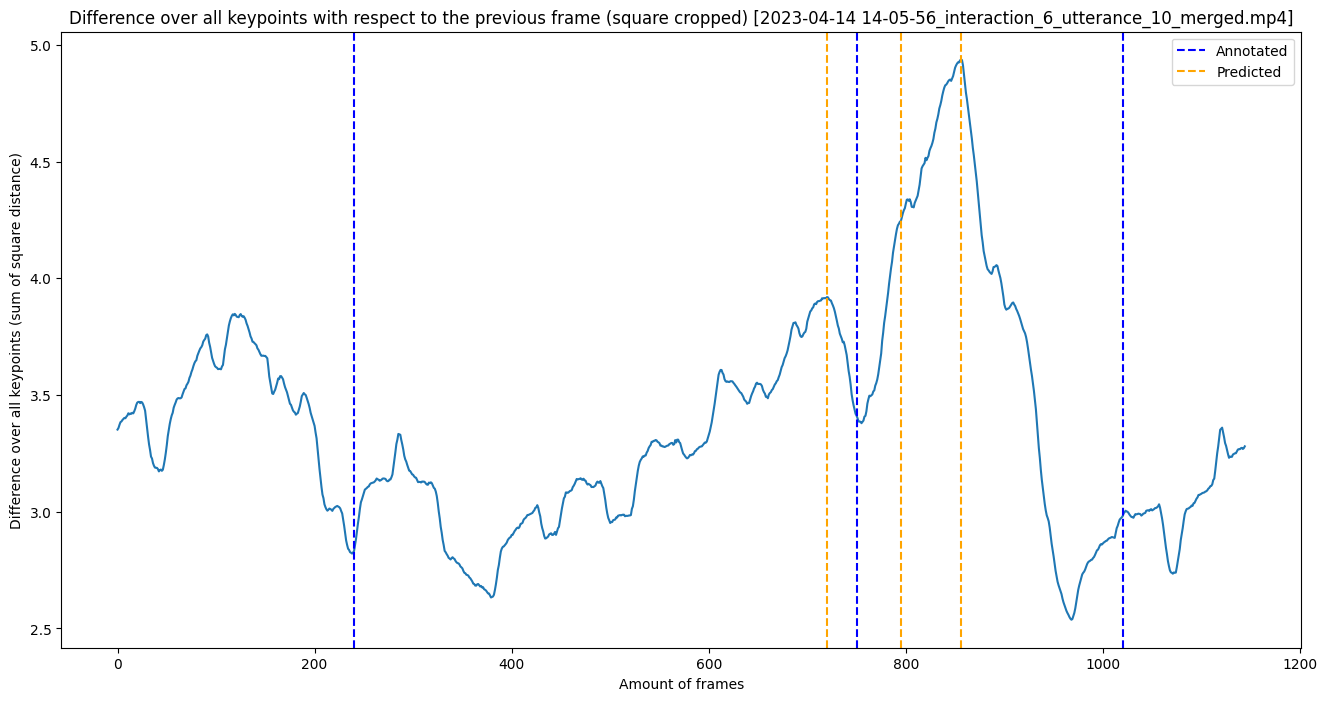

169


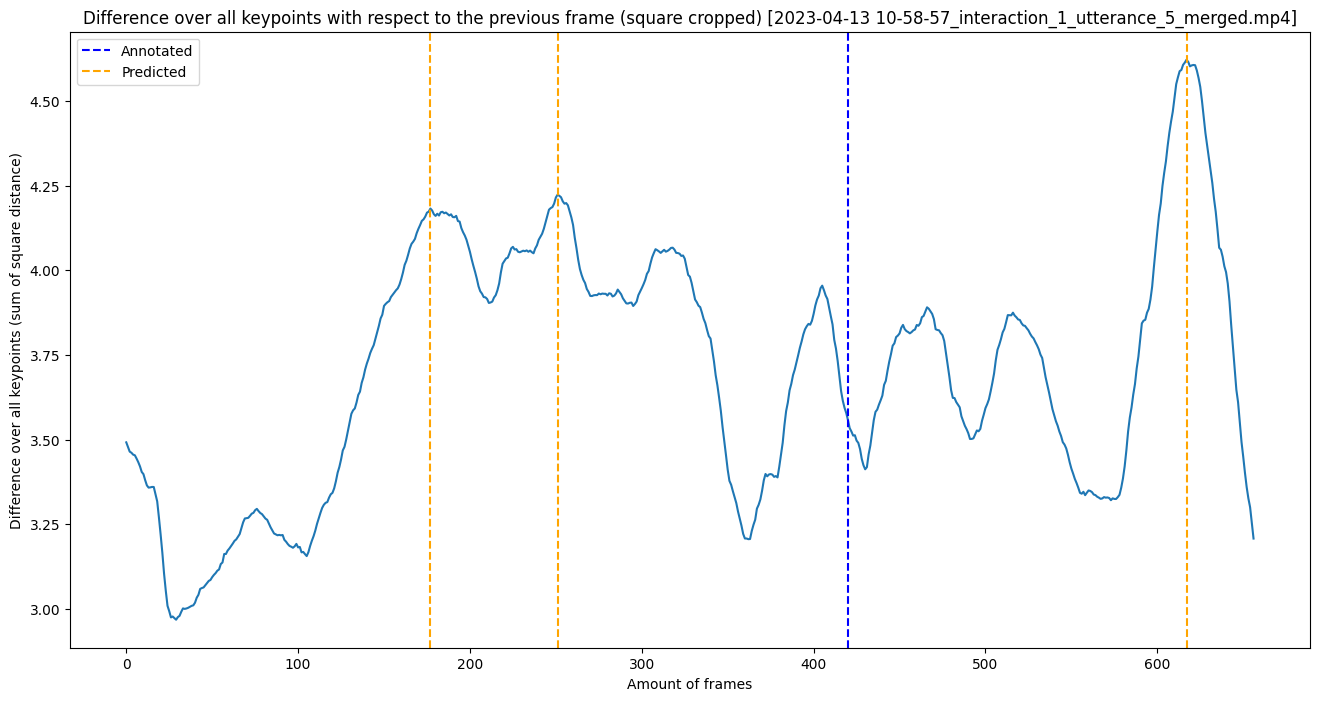

87


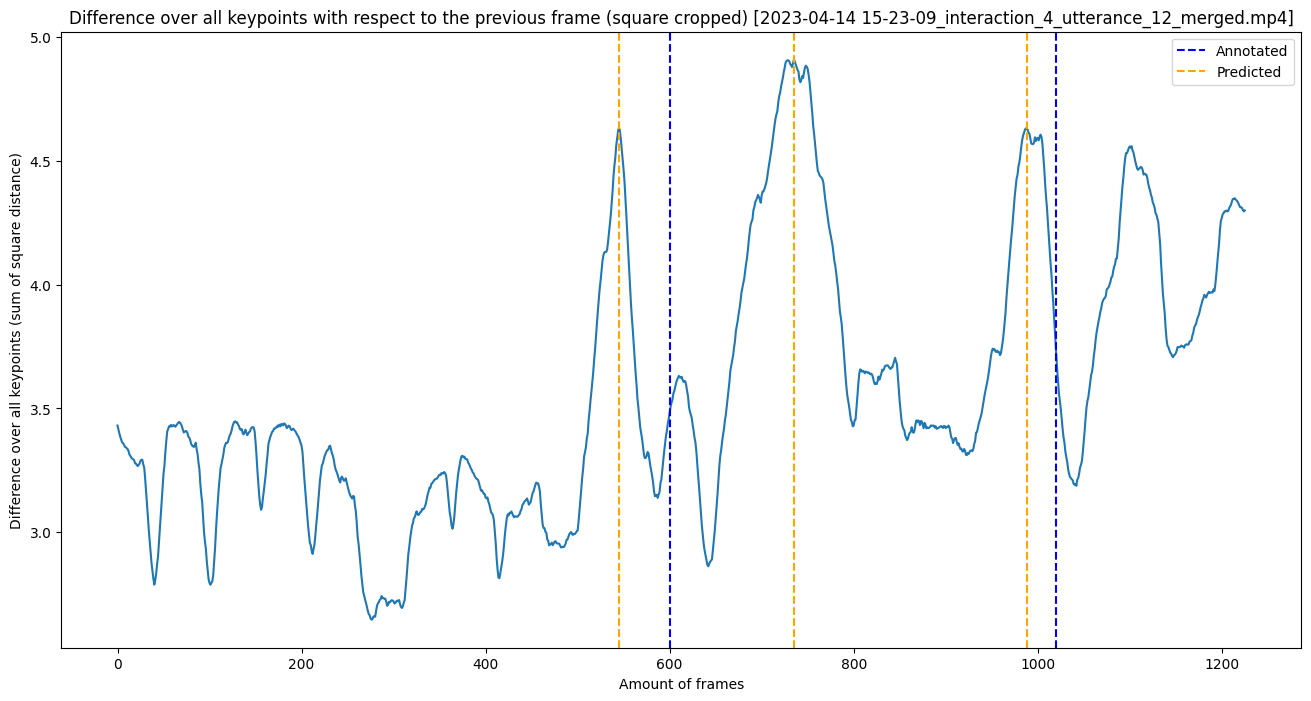

111


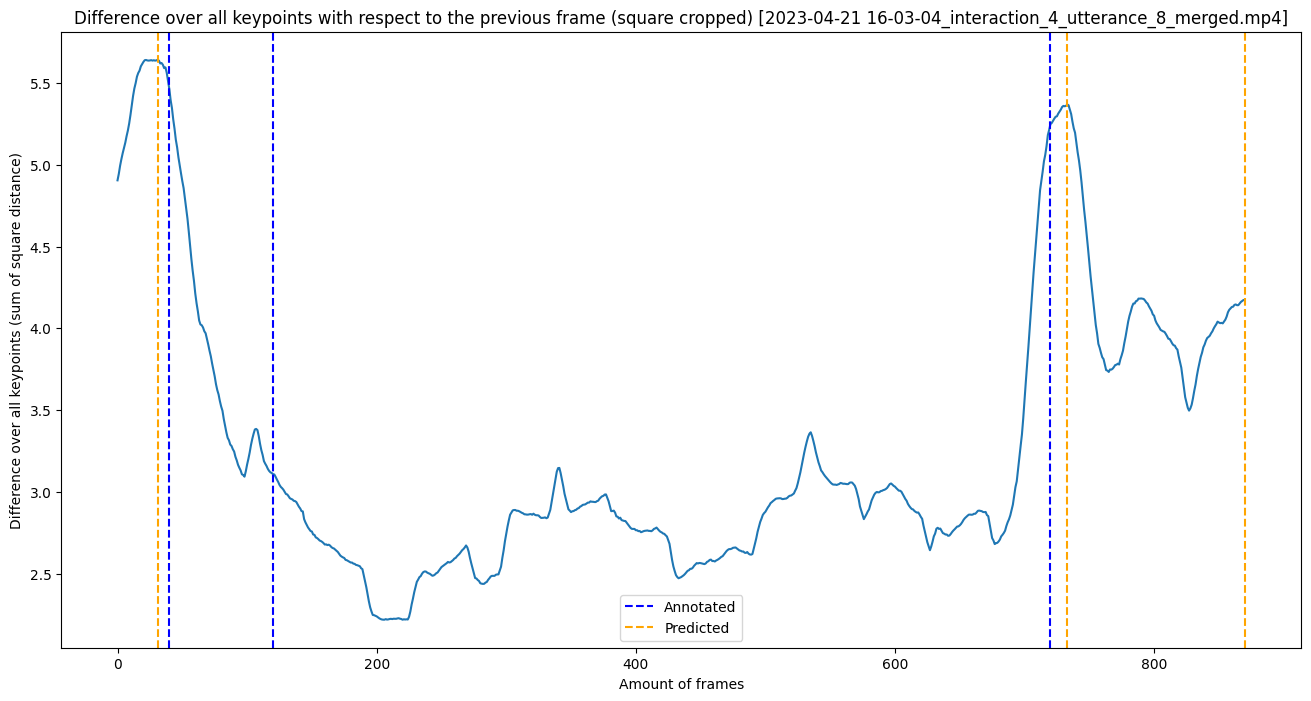

180


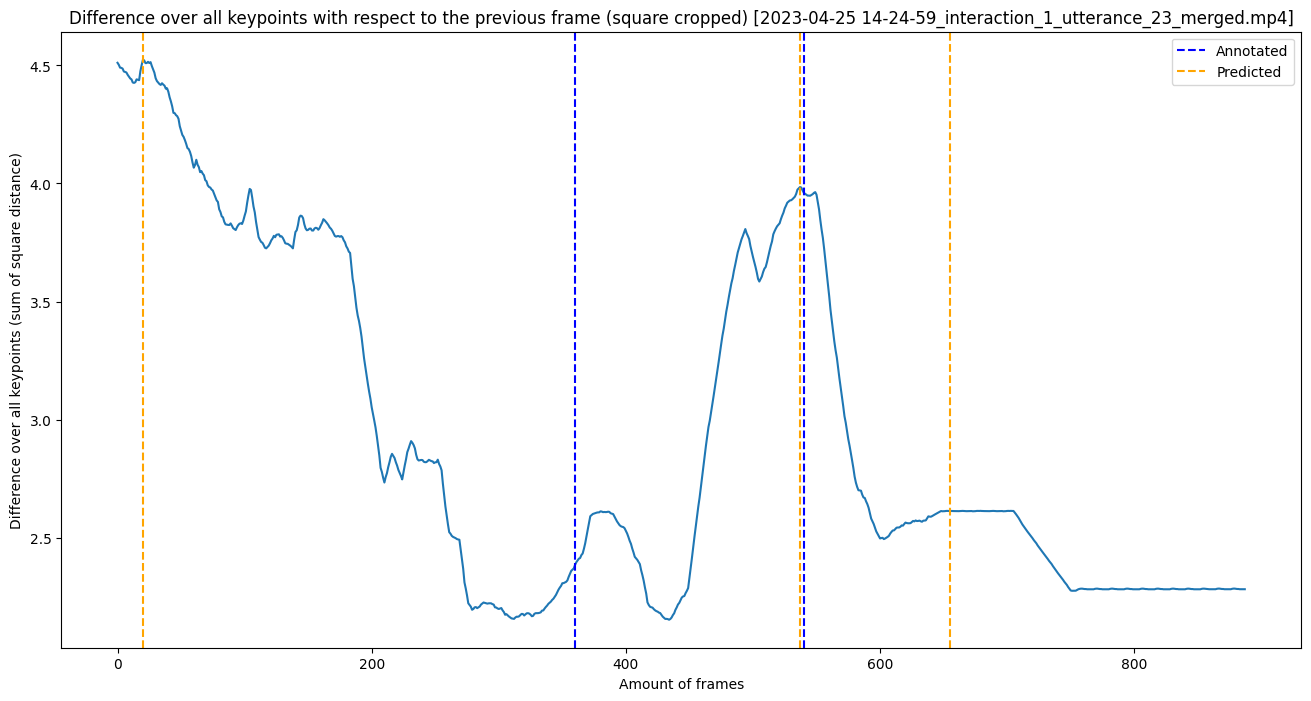

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fc9ccfcb810>>
Traceback (most recent call last):
  File "/root/miniconda3/envs/ThesisRobot/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


204


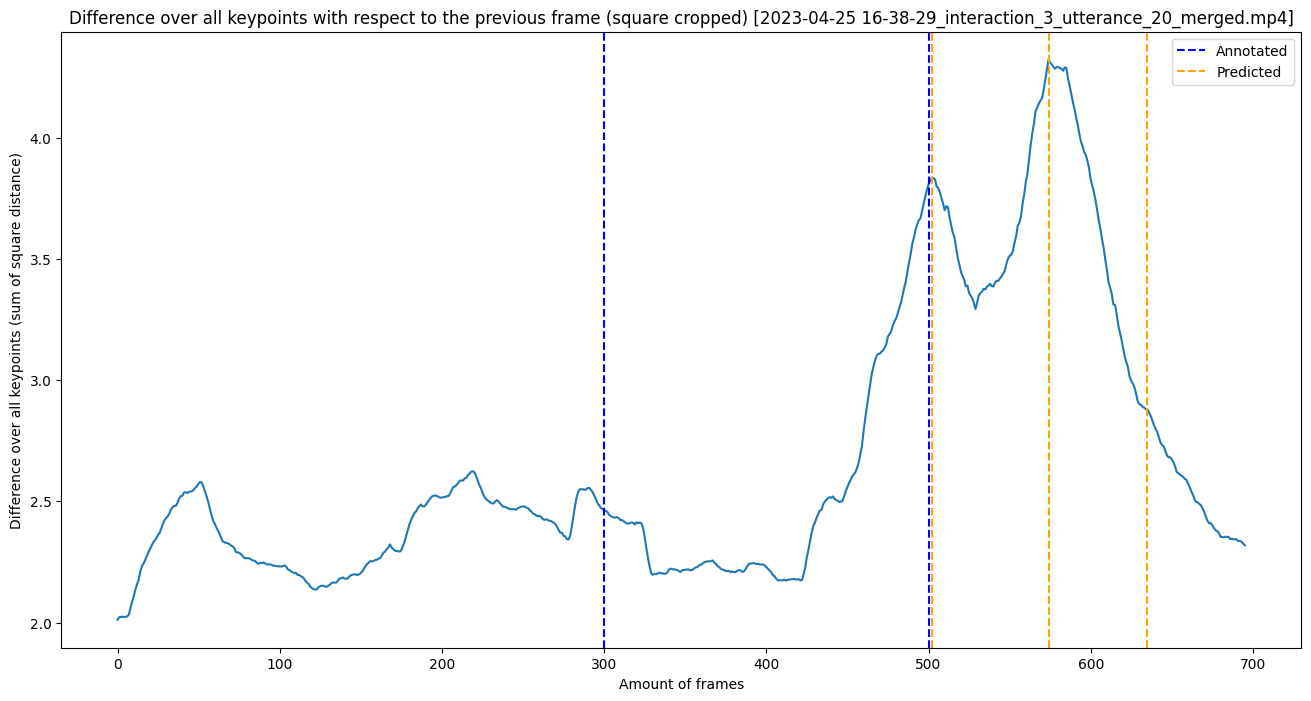

146


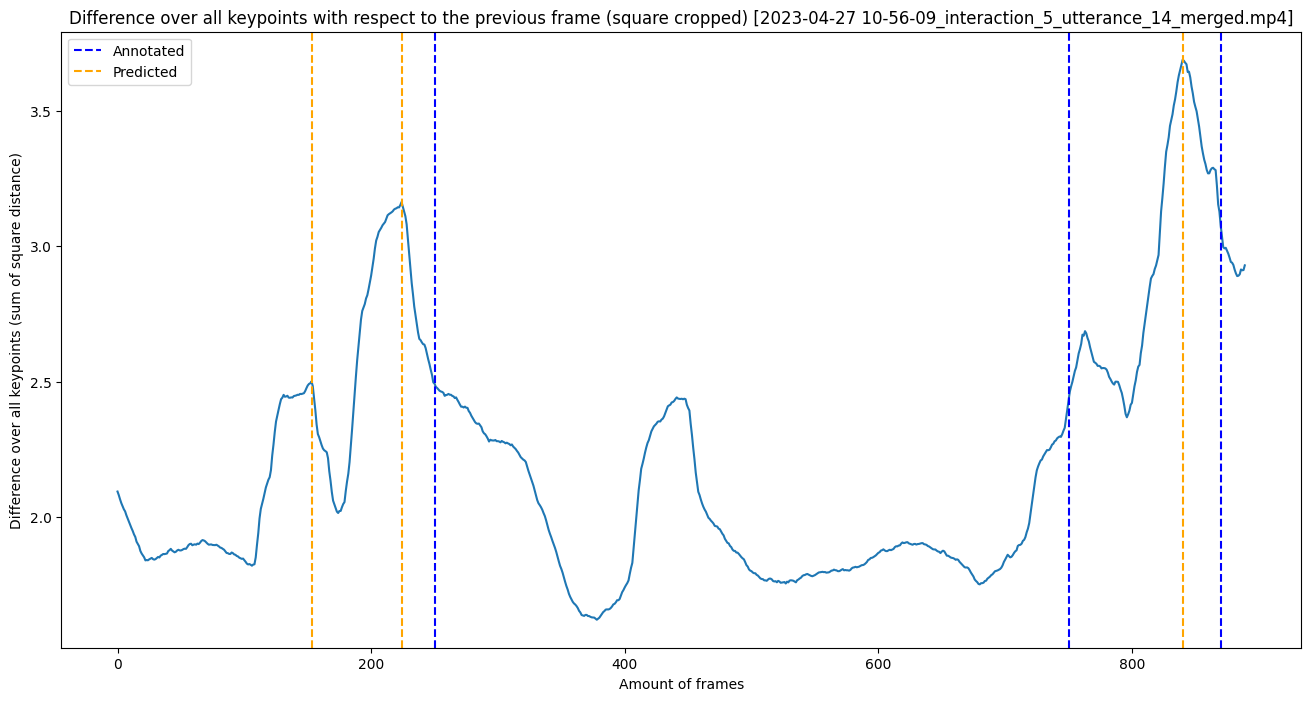

39


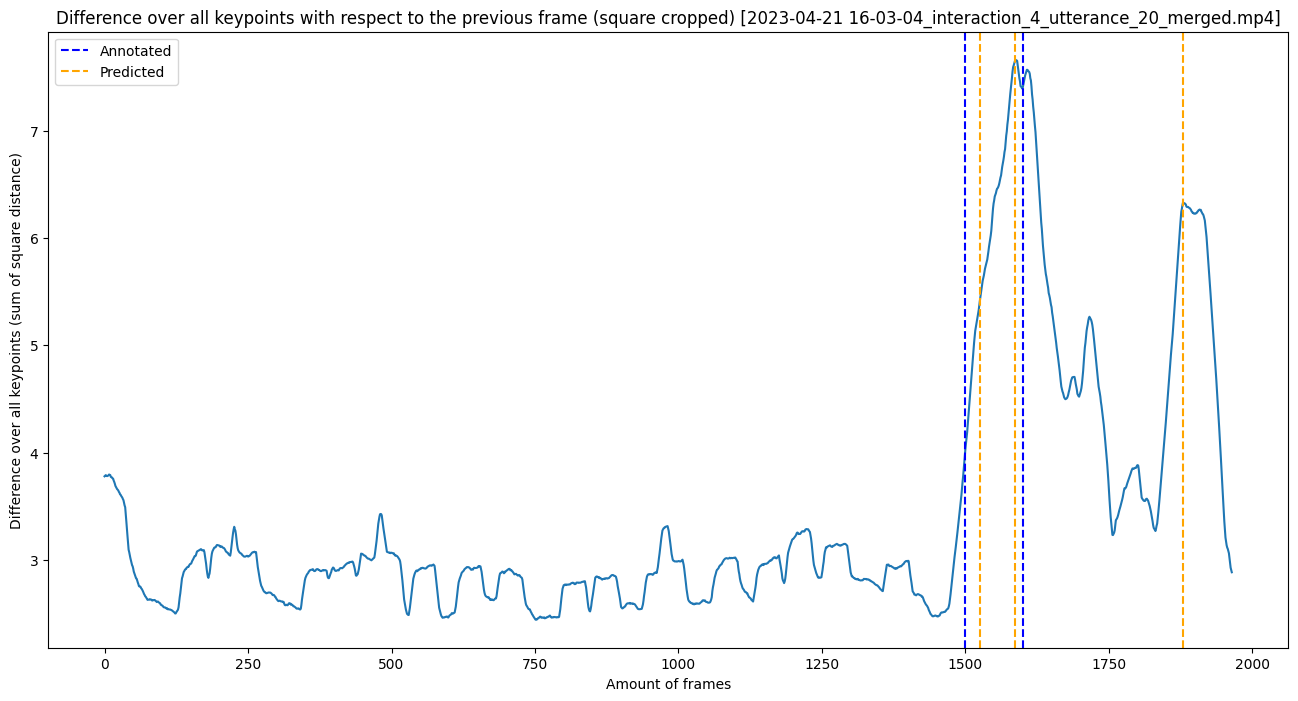

114


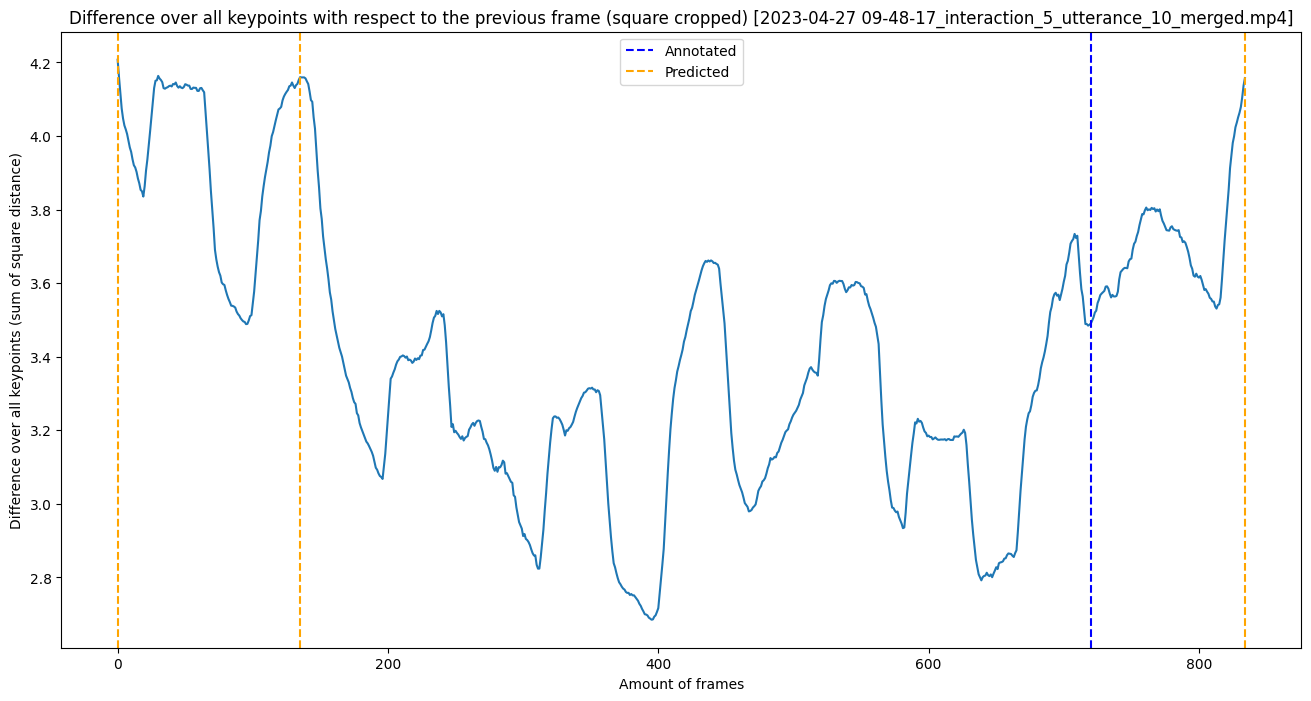

100


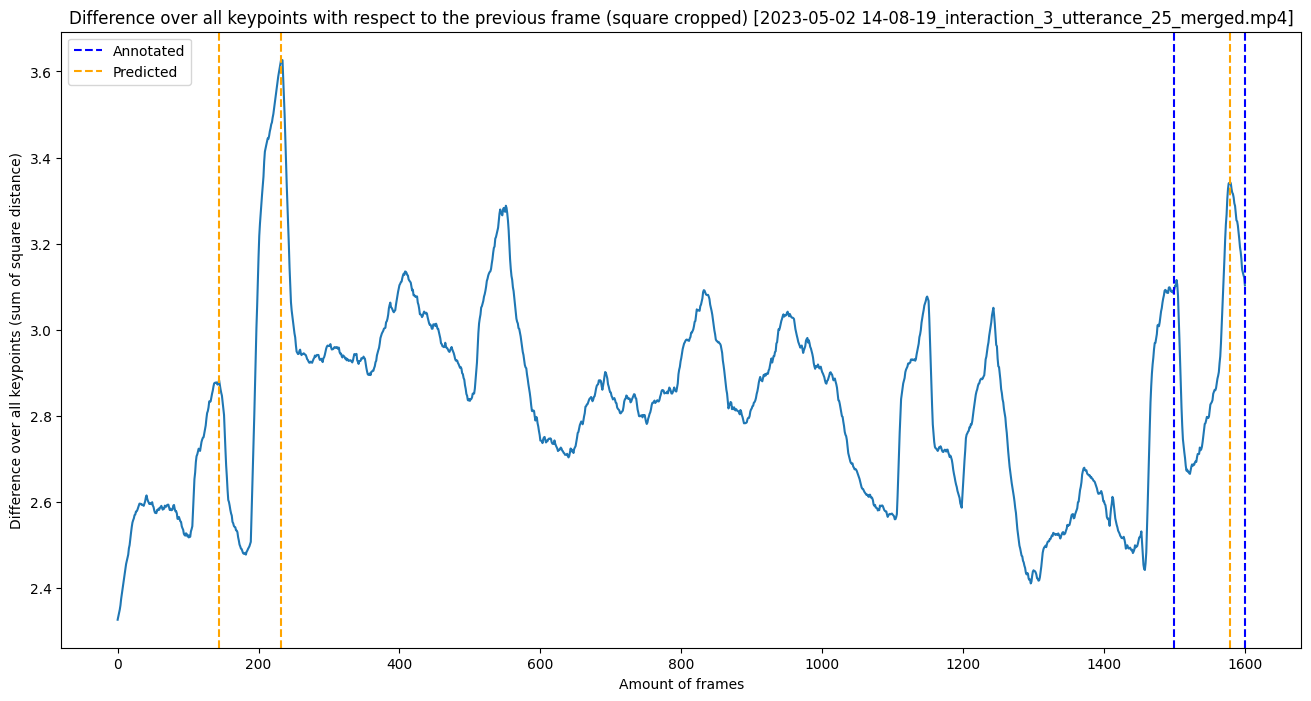

135


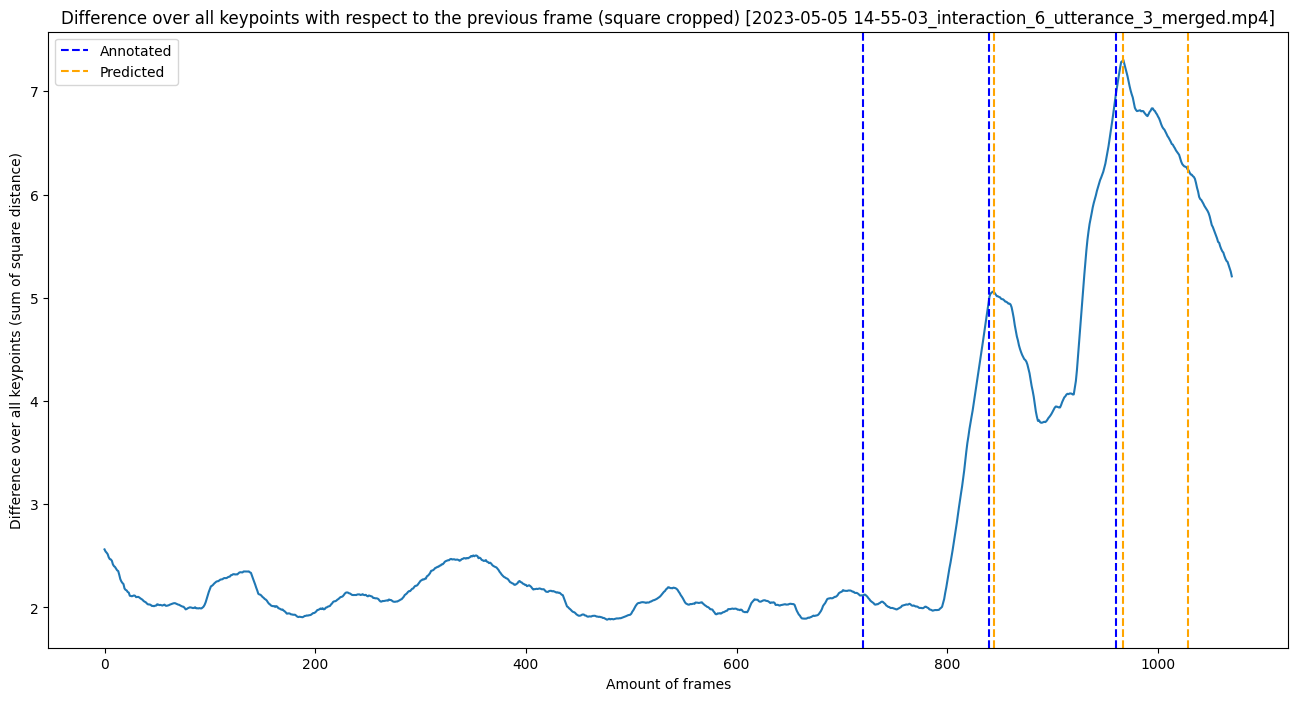

445


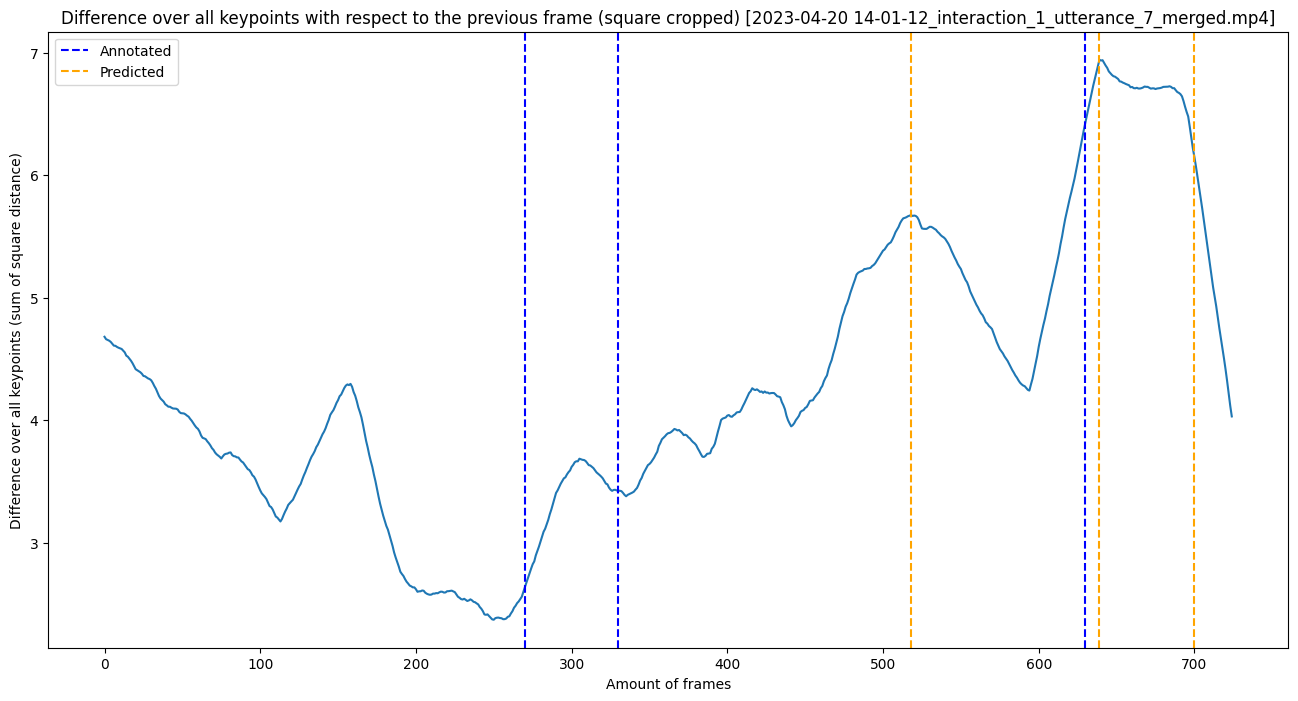

226


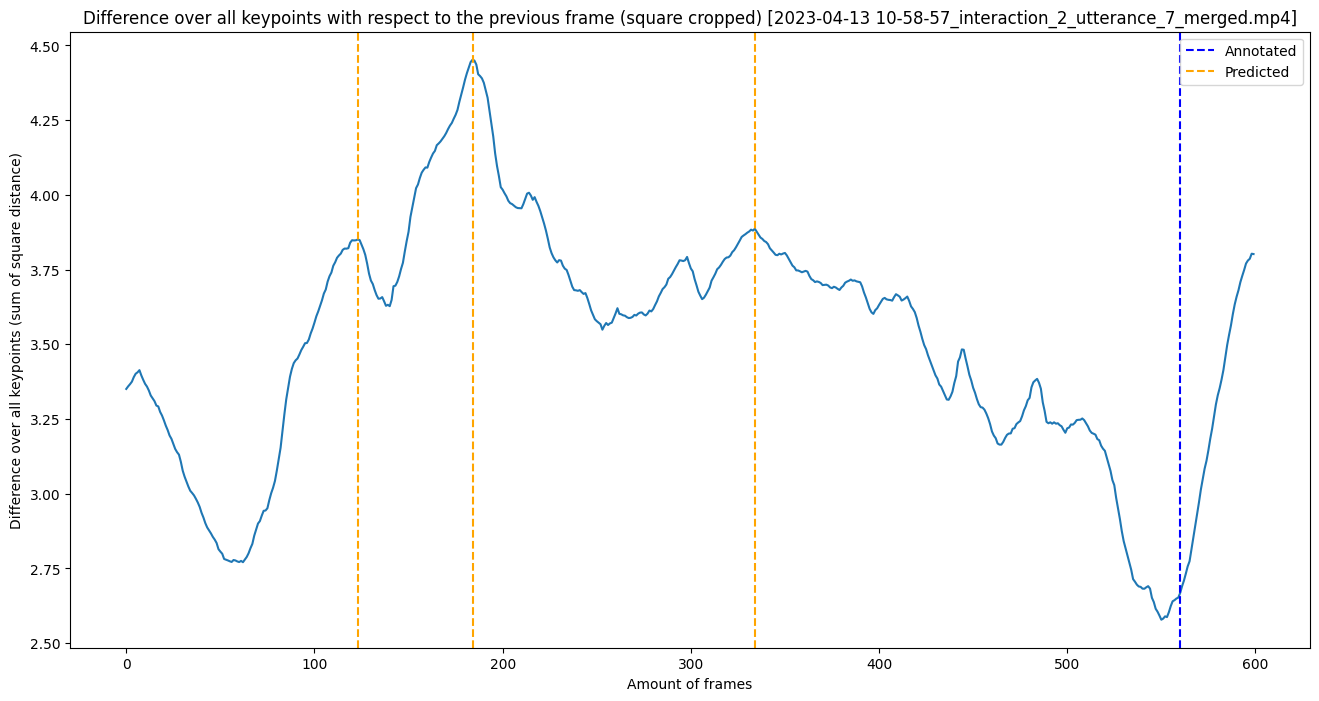

3055


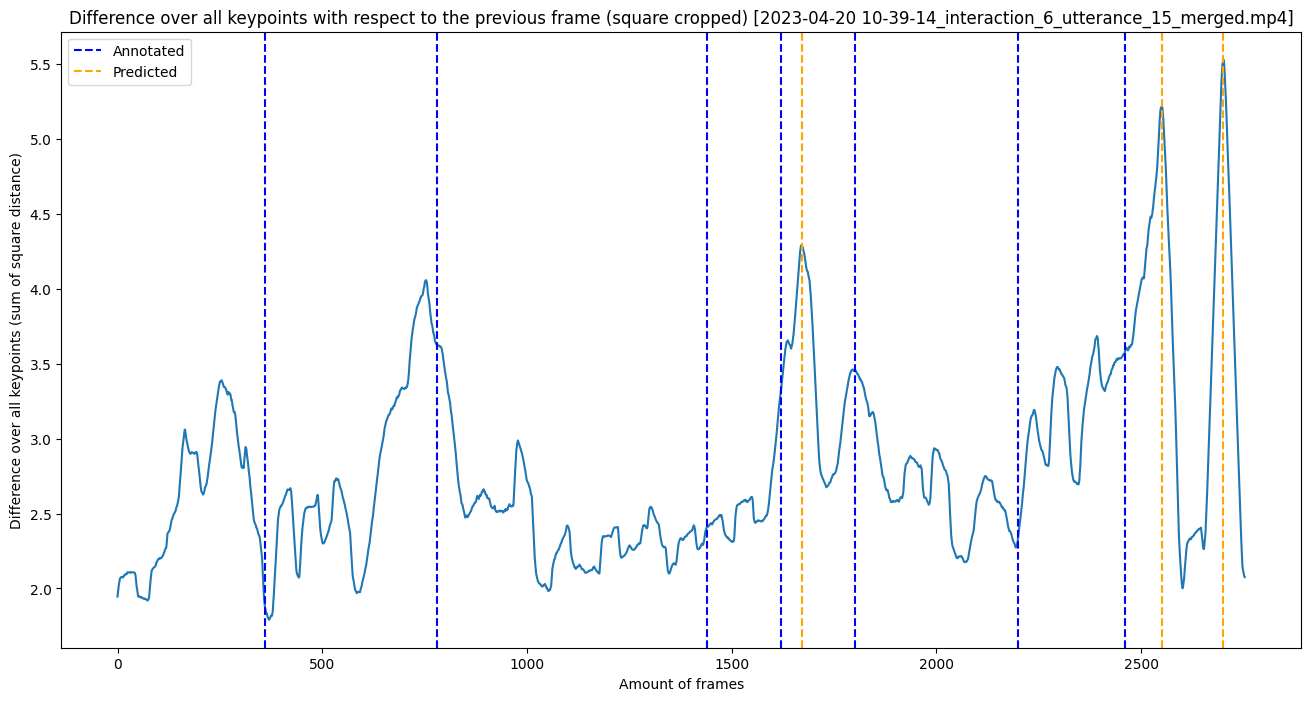

302


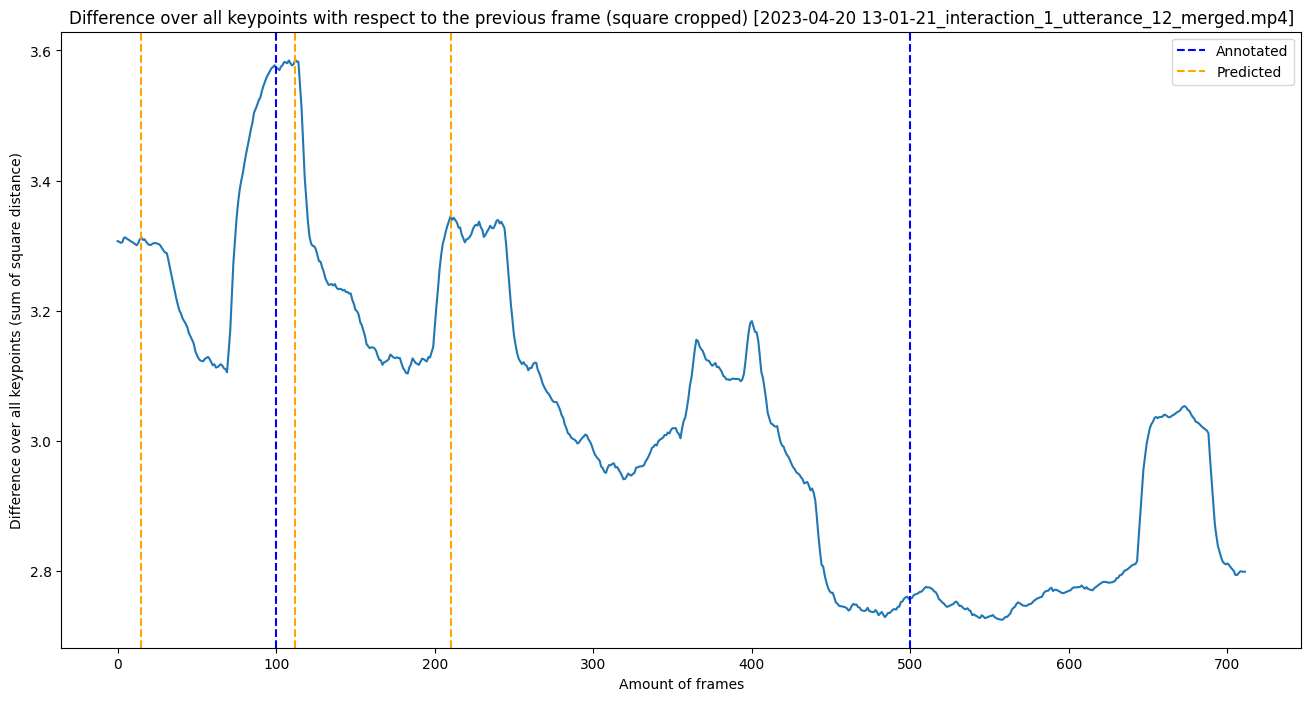

443


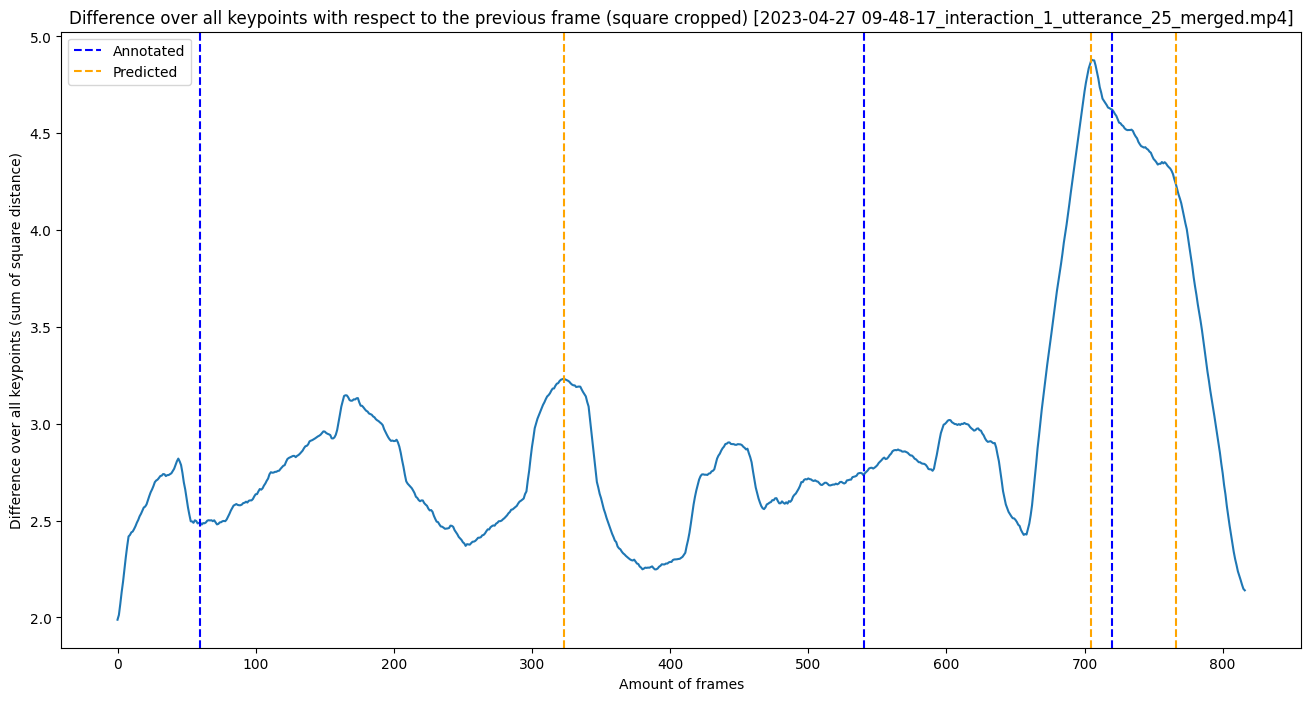

70


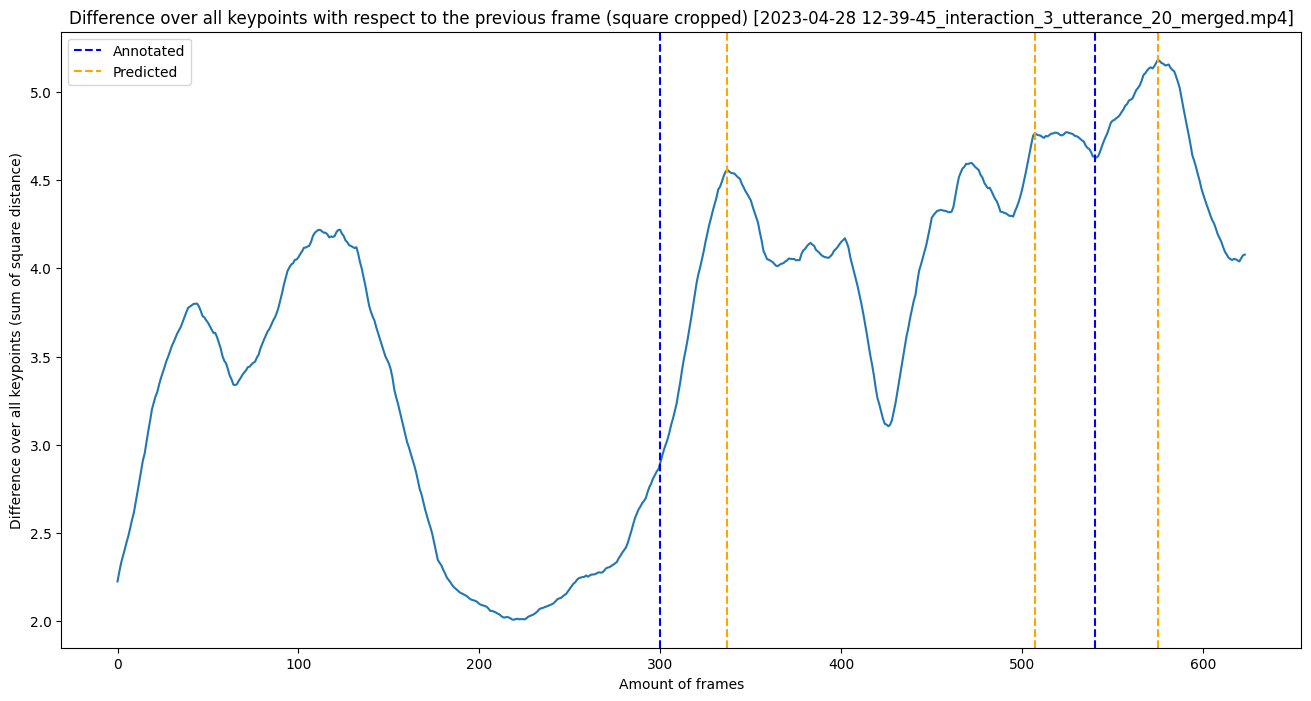

2406


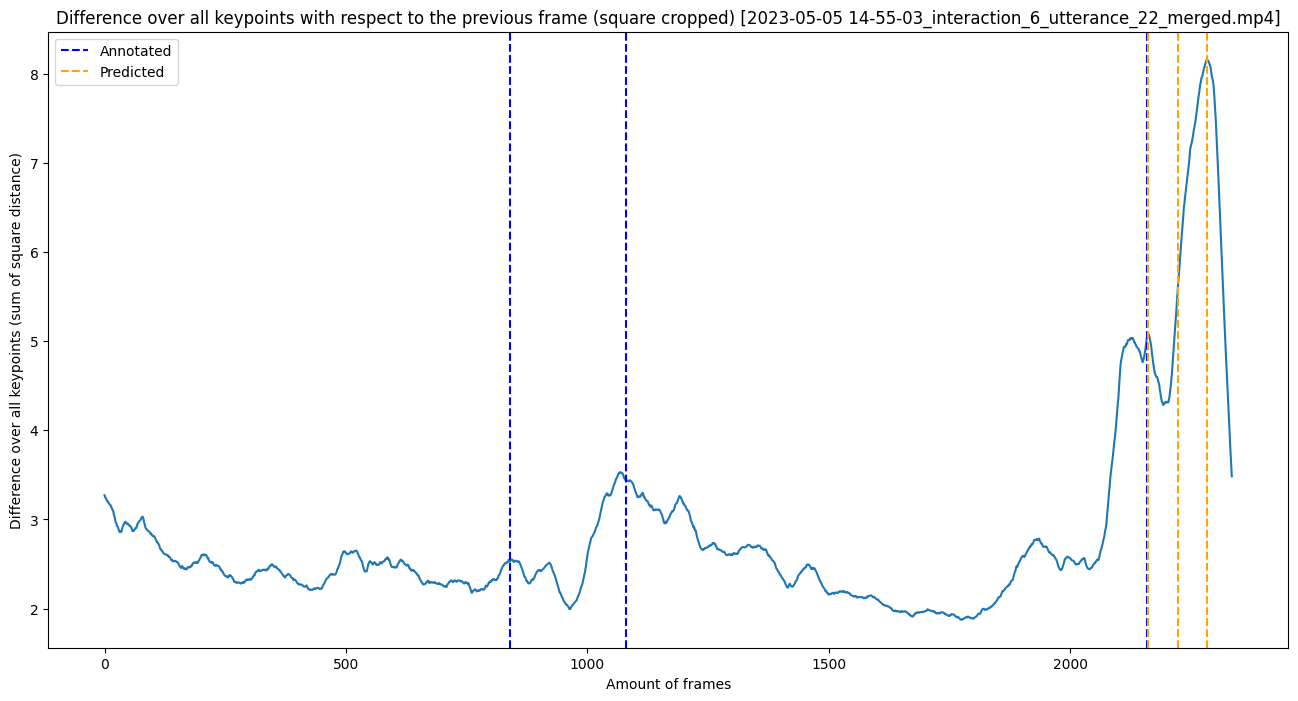

28


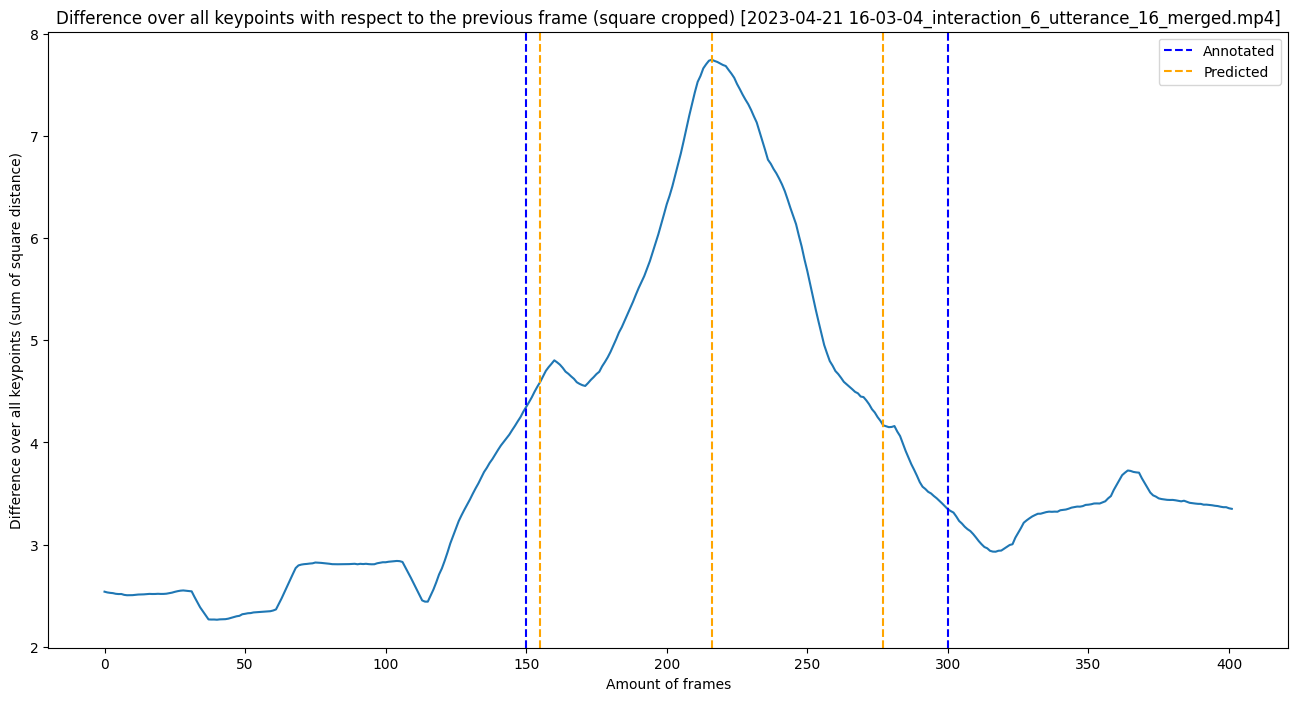

338


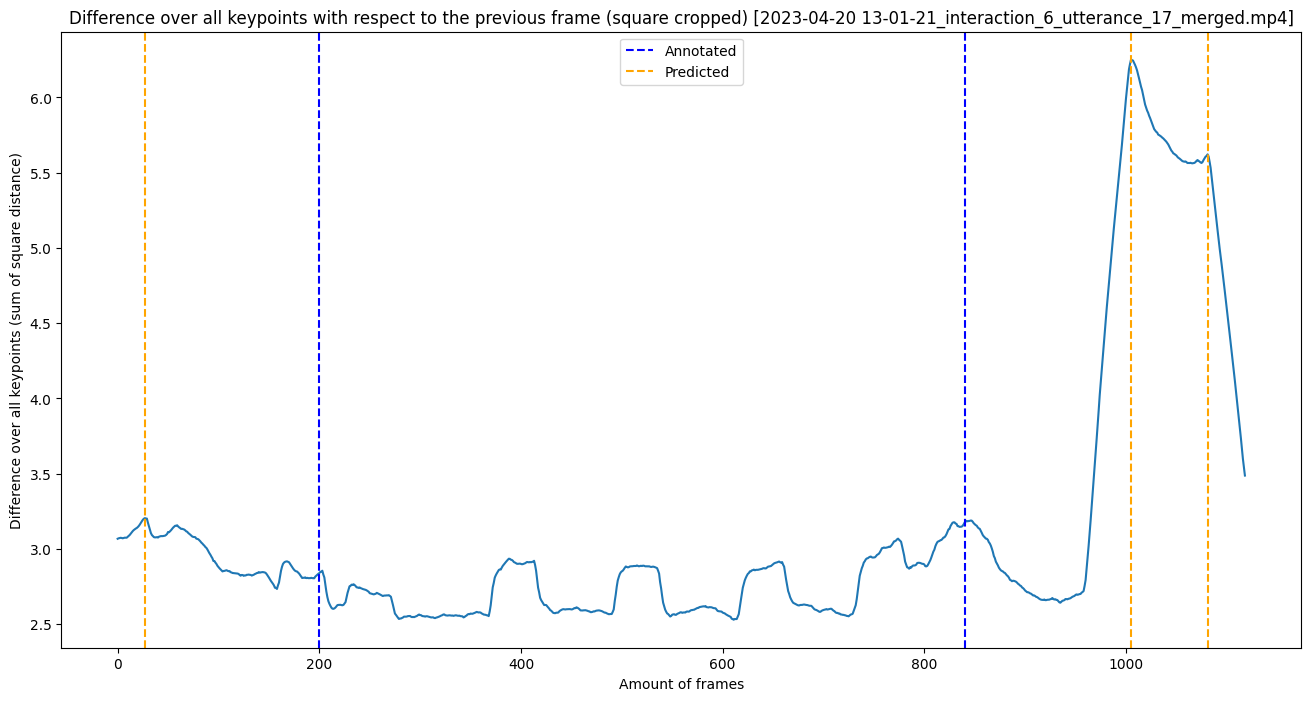

Total predictions: 23/49
Total minimum distance: 9272
[674, 169, 87, 111, 180, 204, 146, 39, 114, 100, 135, 445, 226, 3055, 302, 443, 70, 2406, 28, 338]
[0.3333333333333333, 0.0, 1.0, 0.6666666666666666, 0.5, 0.5, 0.6666666666666666, 1.0, 0.0, 0.5, 0.6666666666666666, 0.3333333333333333, 0.0, 0.14285714285714285, 0.5, 0.3333333333333333, 1.0, 0.3333333333333333, 1.0, 0.0] -> 0.4738095238095238


In [60]:
amount_of_fragments = 3
window_size = 45
sum_blendshape(amount_of_fragments, window_size, blendshape_objects, verbose=False)

In [52]:
amount_of_fragments = 3
window_size = 45
sum_blendshape(amount_of_fragments, window_size, blendshape_objects_square, verbose=False)

Total predictions: 26/49
Total minimum distance: 9089
[256, 195, 70, 109, 180, 14, 148, 39, 111, 26, 147, 435, 315, 3069, 235, 644, 61, 2362, 27, 646]
[0.6666666666666666, 0.0, 1.0, 0.6666666666666666, 0.5, 1.0, 0.6666666666666666, 1.0, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.14285714285714285, 0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 1.0, 0.5] -> 0.5404761904761906


In [57]:
def sum_strong_blendshape(amount_of_fragments, window_size, objects, length_of_fragment=120, VIDEO_RANGE=20, verbose=True):
    total_right = 0
    total_pred = 0
    total_min_distance = 0
    all_min_distance = []
    percentage_correct_pred_video = []
    for index_video in range(VIDEO_RANGE):
        differences = []
        for blendshapes in objects[index_video]:
            sum = 0
            for i, blendshape in enumerate(blendshapes):
                if BLENDNAMES[i] in STRONG_BLENDNAMES:
                    sum += blendshape
            differences.append(sum)

        differences = np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2]
        
        sorted_max = np.argsort(differences)

        cut_frames = []
        count = -1
        while len(cut_frames) != amount_of_fragments:
            maxi = sorted_max[count]
            if all(maxi > cut + 60 for cut in cut_frames) or all(maxi < cut - 60 for cut in cut_frames):
            # if not old_maxi or maxi > old_maxi + length_of_fragment or maxi < old_maxi - length_of_fragment:
                cut_frames.append(maxi)
            count -= 1
            if abs(count) > len(sorted_max):
                break
    
        cut_frames = sorted(cut_frames)

        # Calculate start and end for cutting different fragments and save the video
        cut_tuple_frames = [(cut - length_of_fragment//2, cut + length_of_fragment//2 - 1) for cut in cut_frames] # -1 for taking getting a total of 360 frames
        # save_video(videos[index_video], f"{outpath}{videos[index_video].split('/')[-1][:-10]}short.mp4", cut_tuple_frames)
        # save_video(videos[index_video], f"out.mp4", cut_tuple_frames)

        if verbose:
            # Plot the figure
            plt.figure(figsize=(16,8))
            # plt.plot(np.convolve(differences, np.ones(window_size)/window_size, mode='same')[window_size//2:-window_size//2])
            plt.plot(differences)
        
            # Option to show different blendshapes
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkLeft"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeBlinkRight"]], color='green')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownLeft"]], color='black')
            # plt.plot(get_frames_per_blendshape(normalize_blendshapes(blendshape_objects[index_video]))[blendshape_dict["eyeLookDownRight"]], color='black')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownRight"]], color='purple', label='browDownRight')
            # plt.plot(get_frames_per_blendshape(blendshape_objects[index_video])[blendshape_dict["browDownLeft"]], color='purple')
                
            for i, frame in enumerate(all_frames[index_video]):
                if i == 0:
                    plt.axvline(x=frame, color='blue', linestyle='--', label='Annotated')
                else:
                    plt.axvline(x=frame, color='blue', linestyle='--')
            
            for i, cut in enumerate(cut_frames):
                if i == 0:
                    plt.axvline(x=cut, color='orange', linestyle='--', label='Predicted')
                else:
                    plt.axvline(x=cut, color='orange', linestyle='--')

        amount_of_close_predictions = 0
        for frame in all_frames[index_video]:
            frame_found = False
            for cut_frame in cut_frames:
                if not frame_found and abs(frame - cut_frame) < 60:
                    amount_of_close_predictions += 1
                    frame_found = True
            
        min_distance = 0
        for frame in all_frames[index_video]:
            min_distance += min(abs(np.array(cut_frames) - frame))               

        if verbose:
            print(min_distance)
        all_min_distance.append(min_distance)
        total_min_distance += min_distance
        total_right += amount_of_close_predictions
        total_pred += len(all_frames[index_video])
        percentage_correct_pred_video.append(amount_of_close_predictions / len(all_frames[index_video]))
        
        if verbose:
            plt.xlabel("Amount of frames")
            plt.ylabel("Difference over all keypoints (sum of square distance)")
            plt.title(f"Difference over all keypoints with respect to the previous frame (square cropped) [{square_videos[index_video].split('/')[-1]}]")
            plt.legend()
            plt.show()

    print(f"Total predictions: {total_right}/{total_pred}")
    print(f"Total minimum distance: {total_min_distance}")
    print(all_min_distance)
    print(f"{percentage_correct_pred_video} -> {np.mean(percentage_correct_pred_video)}")

In [58]:
amount_of_fragments = 3
window_size = 45
sum_strong_blendshape(amount_of_fragments, window_size, blendshape_objects, verbose=False)

Total predictions: 20/49
Total minimum distance: 11928
[332, 87, 209, 143, 650, 208, 17, 61, 567, 1990, 147, 490, 170, 3263, 212, 640, 37, 2370, 28, 307]
[0.3333333333333333, 0.0, 0.0, 0.6666666666666666, 0.0, 0.5, 1.0, 1.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.2857142857142857, 0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 1.0, 0.0] -> 0.37261904761904757


In [59]:
amount_of_fragments = 3
window_size = 45
sum_strong_blendshape(amount_of_fragments, window_size, blendshape_objects_square, verbose=False)

Total predictions: 24/49
Total minimum distance: 10021
[349, 6, 420, 117, 596, 31, 15, 63, 67, 1084, 138, 292, 65, 3551, 244, 251, 32, 2374, 28, 298]
[0.3333333333333333, 1.0, 0.5, 0.6666666666666666, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.14285714285714285, 0.5, 0.6666666666666666, 1.0, 0.3333333333333333, 1.0, 0.0] -> 0.5071428571428572
